<a href="https://colab.research.google.com/github/raulbenitez/conceptosclaros_ML/blob/master/Algoritmos_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de clasificación supervisada

## Procedimiento general

Partimos de una bsase de datos etiquetada, es decir de una matriz de datos $X$ de tamaño $n \times m$ donde n es el número de observaciones y m el número de variables o atributos. En problemas de naturaleza supervisada es preciso también disponer de un vector de etiquetas de clase $\omega_i, i=1\dots n$ que 
indique a la clase a la que pertenece cada una de las observaciones del conjunto de datos $X$. 

PAra entrenar un algoritmo de clasificación supervisada es preciso dividir el 
conjunto de datos y sus etiquetas en dos subconjuntos: 
- Un primer subconjunto que llamaremos de entrenamiento y qye servirá para diseñar/entrenar/ajustar el algoritmo. Este subconjunto suele construirse seleccionando aleatoriamente un $70\%$ de las $n$ observaciones. 

- El resto de observaciones se incuyen en un segundo subconjunto al que llamaremos conjunto de test o de validación y que servirá para determinar el rendimiento del clasificador. El rendimiento del clasificador se suele indicar en función del número de errores de clasificación, que en un problema con dos clases son ser del tipo falsa alarma u omisión.



Ejemplo: Cargemos el conjunto de datos iris y construyamos los subconjuntos de entrenamiento y validación:

In [2]:
from sklearn.datasets import load_iris
diris = load_iris()

Representemos los datos en forma de scatterplot multidimensional:

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

d = pd.DataFrame(diris.data,columns=diris.feature_names)
d['target'] = np.array(diris.target)
d.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


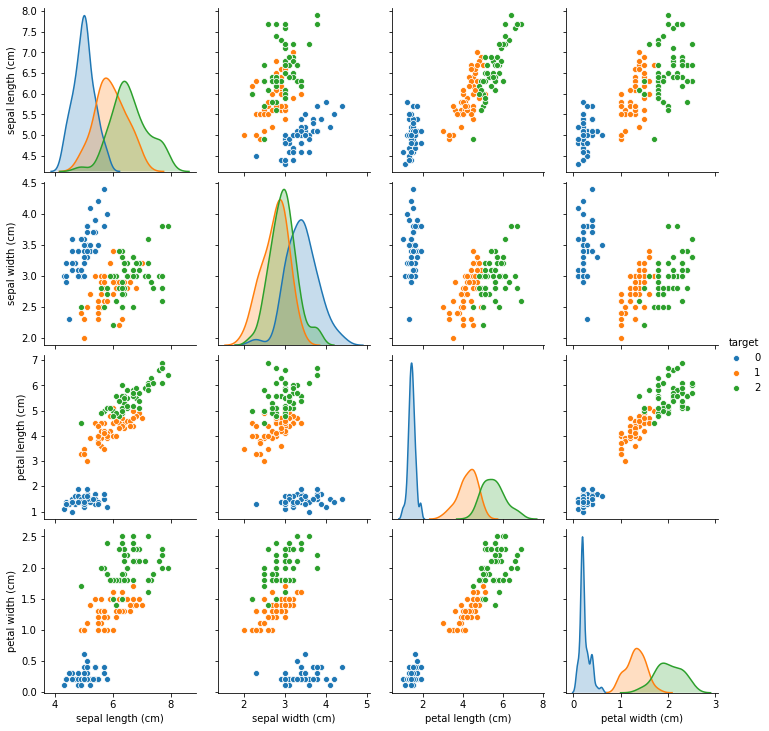

In [4]:
sns.pairplot(d,hue='target')

In [5]:
X = diris.data # matriz de datos 
y = diris.target    # vector de etiquetas de clase 

print('Hay {} observaciones y {} variables'.format(X.shape[0],X.shape[1]))
print('El vector de etiquetas de clase tiene {} componentes'.format(y.shape[0]))

Hay 150 observaciones y 4 variables
El vector de etiquetas de clase tiene 150 componentes


Dividamos el dataset en los subconjuntos de entrenamiento y test. La variable test_size indica la fracción de datos que guardamos para el test. 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Número de observaciones del conjunto de entrenamiento es {}'.format(X_train.shape[0]))
print('Número de observaciones del conjunto de test es {}'.format(X_test.shape[0]))

Número de observaciones del conjunto de entrenamiento es 100
Número de observaciones del conjunto de test es 50


Ahora viene cuando sacamos la batería de algoritmos de clasificación supervisada. Cada uno responde a una idea de naturaleza algebraica, geométrica, estadística o informática. En toda la sesión utilizaremos las librerías de reconocimiento de patrones, inteligencia artificial y machine learning scikit-learn: https://scikit-learn.org/stable/

## Algoritmo KNN (k nearest neighbours, k Vecinos más cercanos)

Entrenamos el modelo

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Si queremos predecir la clase a la que pertenece la primera observación del conjunto de test, haremos:

In [8]:
xnew = X_test[0].reshape(1,-1)
true_label = y_test[0]
predicted_label = knn.predict(xnew)
print('Observación a predecir es {}'.format(*xnew))
print('la clase real a la que pertenece es {}'.format(true_label))
print('la clase que predice el algoritmo KNN que hemos entrenado es {}'.format(predicted_label))

Observación a predecir es [6.1 2.8 4.7 1.2]
la clase real a la que pertenece es 1
la clase que predice el algoritmo KNN que hemos entrenado es [1]


Ahora procedemos a ver cómo se comporta el clasificador con todos los datos del conjunto de test:

In [9]:
from sklearn.metrics import confusion_matrix

y_knn_pred = knn.predict(X_test)
confusion_matrix(y_test, y_knn_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

## Naive Bayes:

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

gnb = GaussianNB()
y_NB_pred = gnb.fit(X_train, y_train).predict(X_test)

confusion_matrix(y_test, y_NB_pred)

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 15]])

Árbol de decisión (Decision trees):

In [11]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)

Representar gráficamente el árbol de decisión:

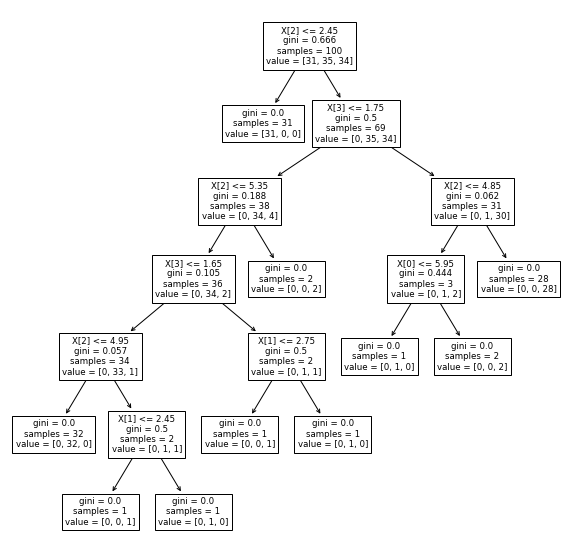

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax = plot_tree(dt) 
plt.show()

Validar el rendimiento con el conjunto de test:

In [13]:
y_DT_pred = dt.predict(X_test)

confusion_matrix(y_test, y_DT_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

Los tres algoritmos funcionan igual de bien! El motivo es que el dataset de iris es fácil de clasificar. Probemos con un problema algo más complicado. 

### Ejercicio: Aplicar los algoritmos de clasificación KNN, Naive Bayes y Decision trees a la base de datos mtcars con el objetivo de predecir el origen del coche utilizando únicamente los atributos numéricos y eliminando las observaciones que tengan datos incompletos.


In [36]:
import pandas as pd 
import seaborn as sns 
mpg = sns.load_dataset("mpg")
mpg_nonans = mpg.dropna() # remove observations with NaNs

mpg_num = mpg_nonans.select_dtypes(include='number') # keep only numeric variables 

print('datos originales = {}'.format(mpg.shape))
print('datos numericos sin NaNs = {}'.format(mpg_nonans.shape))
print('datos numericos = {}'.format(mpg_num.shape))


datos originales = (398, 9)
datos numericos sin NaNs = (392, 9)
datos numericos = (392, 7)


In [37]:
mpg_nonans.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [50]:
X = mpg_num
y = mpg_nonans['origin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [51]:
X_train.shape

(262, 7)

In [52]:
knn = KNeighborsClassifier(n_neighbors=3)
y_knn_pred = knn.fit(X_train, y_train).predict(X_test)
CM_KNN = confusion_matrix(y_test, y_knn_pred)
print('CONFUSION MATRIX KNN: \n {} '.format(CM_KNN))

gnb = GaussianNB()
y_NB_pred = gnb.fit(X_train, y_train).predict(X_test)
CM_NB = confusion_matrix(y_test, y_NB_pred)
print('CONFUSION MATRIX NB: \n {}'.format(CM_NB))


dt = tree.DecisionTreeClassifier()
y_DT_pred = dt.fit(X_train,y_train).predict(X_test)
CM_DT = confusion_matrix(y_test, y_DT_pred)

print('CONFUSION MATRIX DT: \n {}'.format(CM_DT))


CONFUSION MATRIX KNN: 
 [[ 9 12  9]
 [ 4 13  8]
 [ 2  8 65]] 
CONFUSION MATRIX NB: 
 [[12 15  3]
 [ 5 18  2]
 [14  7 54]]
CONFUSION MATRIX DT: 
 [[17  8  5]
 [ 6 15  4]
 [ 4  3 68]]


## Medidas de evaluación

A parte de la matriz de confusión, existen diferentes medidas y estrategias que permiten caracterizar el rendimiento de un clasificador supervisado. En esta página encontraréis un resumen de todas las medidas y su significado: https://en.wikipedia.org/wiki/Sensitivity_and_specificity

### Precision, recall, f1-score: 

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_DT_pred))

              precision    recall  f1-score   support

      europe       0.63      0.57      0.60        30
       japan       0.58      0.60      0.59        25
         usa       0.88      0.91      0.89        75

    accuracy                           0.77       130
   macro avg       0.70      0.69      0.69       130
weighted avg       0.77      0.77      0.77       130



### Validación cruzada de k-iteraciones: k-fold coss-validation: 
Se trata de una técnica que evalúa las medidas de rendimiento del clasificador promediado los resultados obtenidos en k iteraciones de entrenamiento y valiadción. En cada iteración se dividen los datos de forma aleatoria entre 
entrenamiento y test de manera en cada iteración el algoritmo se entrena con diferentes conjuntos de entrenamiento y se evalúa con diferentes conjuntos de test. El rendimiento final se calcula promediando los resultados obtenidos en las k iteraciones. 

Podéis encontrar una descripción detallada de la técnica en https://en.wikipedia.org/wiki/Cross-validation_(statistics)

Calcumemos por ejemplo la accuracy del modelo de árboles de decisión utilizando k-fold cross-validation con $k=5$:

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.78 (+/- 0.16)


## Técnicas avanzadas: Máquinas de soporte vectorial con optimización de hiperparámetros

Support vector machines es una técnica que utiliza un truco llamado 'Kernel Trick': https://en.wikipedia.org/wiki/Kernel_method

De forma general, permite resolver problemas de clasificación en conjuntos de datos que no sean linealmente separables, es decir, en los que no se puede trazar fronteras de decisión lineales para separar las observaciones de las diferentes clases en el espacio multidimensional de los atributos. 

In [55]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
clf.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:

y_svm_pred = clf.predict(X_test)
confusion_matrix(y_test, y_svm_pred)

array([[15, 13,  2],
       [ 5, 16,  4],
       [ 5,  6, 64]])

## CPU time: 

Cómo determinar los tiempos de entrenamiento y de predicción:

In [57]:
import time
startt = time.perf_counter()
clf.fit(X_train, y_train)
fitt = time.perf_counter()-startt
    
print('Training time is: {} seconds '.format(fitt))

startt = time.perf_counter()
score = clf.score(X_test, y_test)
scoret = time.perf_counter() - startt
print('Evaluation time is: {} seconds '.format(scoret))


Training time is: 49.15538424600004 seconds 
Evaluation time is: 0.002256253000041397 seconds 


## Redes neuronales: Artificial Neural Networks

### A GUI to understand the relevance of structure and parameters in ANNs:


Tinkering an artificial neural network with TensorFlow


http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,1&seed=0.82329&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false


In [79]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(alpha=1, max_iter=1000)

ann.fit(X_train, y_train)

y_ann_pred = ann.predict(X_test)
confusion_matrix(y_test, y_ann_pred)


array([[12, 18,  0],
       [ 1, 22,  2],
       [ 2, 21, 52]])

## Comparar diferentes técnicas de clasificación con diferentes tipos de datos:

Se trata de un ejemplo extraído de la documentación de las librerías scikit-learn: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [ ]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

Automatically created module for IPython interactive environment
